<h1>Projectile Motion</h1>
<h2>Projectile Motion without Air Resistance (in a vacuum)</h2>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

<p>Consider a frame on Earth in which gravity is directed downward (i.e. the usual picture!). If we set up our coordinate system such that $x$ is the horizontal direction and $y$ is the vertical direction, we say that, in terms of vectors, $\vec{g}$ is in the <em>negative</em> $y$-direction or $\vec{g}=-g\hat{y}$ where $g\approx9.8$ m/s$^2$.</p>

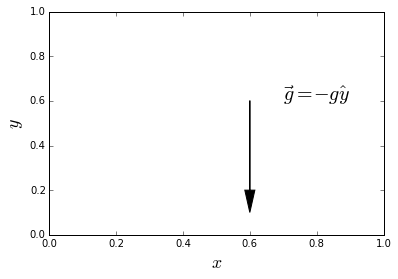

In [2]:
ax = plt.subplot(111)
fs = 18
ax.arrow(.6,.6,0,-.4,head_width=0.03, head_length=0.1, fc='k', ec='k')
ax.set_xlabel(r'$x$',fontsize=fs)
ax.set_ylabel(r'$y$',fontsize=fs)
ax.text(.7,.6,r'$\vec{g}=-g\hat{y}$',fontsize=fs+2)

<p>We call $g$ gravitational acceleration. In other words, gravity accelerates objects in the negative $y$-direction at 9.8 m/s$^2$. This tells us how fast the speed or velocity of some object is changing in time. Let's go ahead then and define the acceleration in terms of the velocity:
$$a=\frac{\Delta v}{\Delta t},~~~\Delta v=v_2-v_1,~~\Delta t = t_2 - t_1,$$
where $v_2$ is the velocity at time $t_2$ and $v_1$ is the velocity at time $t_1$. That being said, if our object, say a baseball, is thrown upward with velocity $v_0$, we can easily write town the ball's velocity at any later time $t$,
$$v(t)=v_0+at=v_0+\frac{\Delta v}{\Delta t}t=v_0-gt.$$
Let's plot this relation.</p>

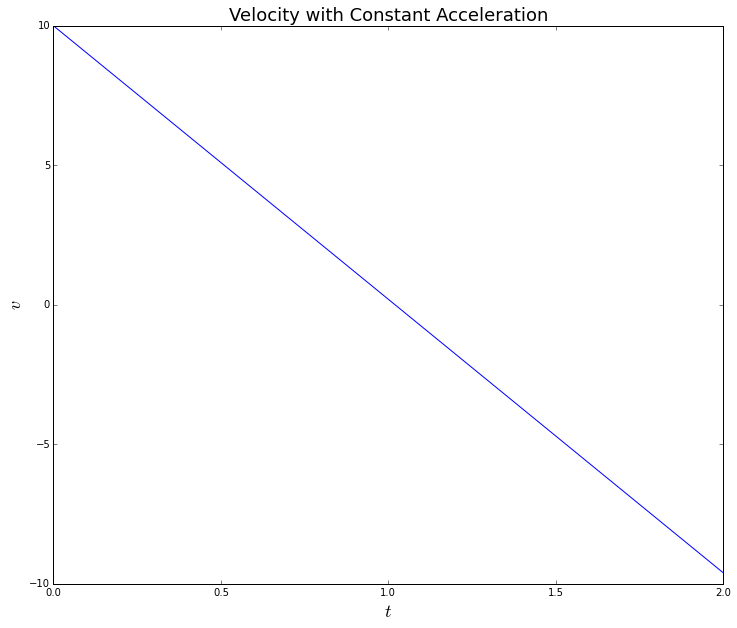

In [3]:
#First define a vector for time
texact = np.linspace(0,2,1000)
#Now define a constant for the initial velocity
v0 = 10 #in m/s
#Next, define the gravitational acceleration
g = -9.8 #in m/s
#Construct the velocity vector
vexact = g*texact + v0
#Plot for velocity with constant acceleration
fig = plt.figure(figsize=(12,10))
ax = fig.gca()
ax.plot(texact,vexact)
ax.set_xlabel(r'$t$',fontsize=fs)
ax.set_ylabel(r'$v$',fontsize=fs)
ax.set_title(r'Velocity with Constant Acceleration',fontsize=fs)

<p>But what if we wanted to find the position of our baseball at some time $t$? Well it turns out that, as you may or may not already know, that by taking successfule integrals of $a_y=-g$, we can derive the following analytic (i.e. exact) equation,
$$
x(t) = x_0+v_0t-\frac{1}{2}gt^2.
$$
However, let's pretend that we don't know enough calculus to derive this relation.</p> 
<p>We now consider our time to be <em>discretized</em>. That is, unlike in real life where time is continuous, we will break up our computational time into (ideally) tiny units. Discretization is what allows our computers to solve the problems we give them. For a computer, there is no such thing as a continuous quantity: everything must be broken up into units. In our example here, we define some initial time $t_0$ (which is equal to 0 most of the time) and some later time $t_{\text{later}}$. Now, we define the spacing between our time points. We want to simulate real time and so we want make our spacing very small. However, we don't want to make our spacing so small that our computational problem takes forever! We call this choosing an appropriate <em>timestep</em> and it is an important problem that crops up in even the most advanced physics simulations and can cause serious errors if not done correctly.</p>
<p>The question still remains then: how do we calculate our position? Let's call the position of our baseball at some time $t_n$, $y_n$. This means that we can say the position at $t_{n+1}$, $y_{n+1}$, is just the position at $t_n$ plus whatever change occured between $t_n$ and $t_{n+1}$,
$$
y_{n+1} = y_n + \Delta y
$$
where $\Delta y = y_{n+1} - y_n$. We can rewrite this relation by multiplying by $\Delta t$ on the top and bottom of the last term (i.e. multiplying by 1),
$$
y_{n+1} = y_n + \Delta t\frac{\Delta y}{\Delta t}
$$
where $\Delta t = t_{n+1} - t_n$. But $\Delta y/\Delta t$ is just the velocity which we calculated above (we should note that we could have used a similar approach to do that calculation) and we know $\Delta t$ because we have already set up our time discretization. We can now <em>iteratively</em> find our position from our calculated velocity and known acceleration.</p>
<p>But now what if we apply the exact same discretization to our velocity calculation that we wrote down analytically (exactly) above? Then our expression for $v_{n+1}$ would be
$$
v_{n+1} = v_n + \Delta t\frac{\Delta v}{\Delta t},
$$
but we've already said $\Delta v/\Delta t=-g$ so,
$$
v_{n+1}=v_n - g\Delta t.
$$
Now, let's solve the baseball problem using our discretization and compare to our analytic formulae.</p>

In [4]:
def euler_projectile_y(tsteps,ta,tb,y0,v0,theta):
    #Define delta t as just the distance between two adjacent points in our discretization
    #We may choose any two points because the spacing is uniform
    t = np.linspace(ta,tb,tsteps)
    deltat = t[1]-t[0]   #Make sure this is positive!

    #Let's make a vector (it can be full of zeros to start with) that will hold our position
    y = np.zeros([tsteps,1])
    #Now make a vector that will hold the velocities
    vy = np.zeros([tsteps,1])

    #Make the first entry of our position vector the initial position
    y[0] = y0
    #Make the first entry of the velocity vector the initial velocity
    vy[0] = np.sin(theta)*v0

    #Iterate over the time vector and find the position
    for i in range(tsteps-1):
        vy[i+1] = vy[i] + deltat*g
        y[i+1] = y[i] + deltat*vy[i]
    
    return [t,y,vy]

In [8]:
#Run the simulation
y0=0.0
results = euler_projectile_y(1000,0,2,0.0,v0,np.pi/2)
t = results[0]
y = results[1]
vy = results[2]

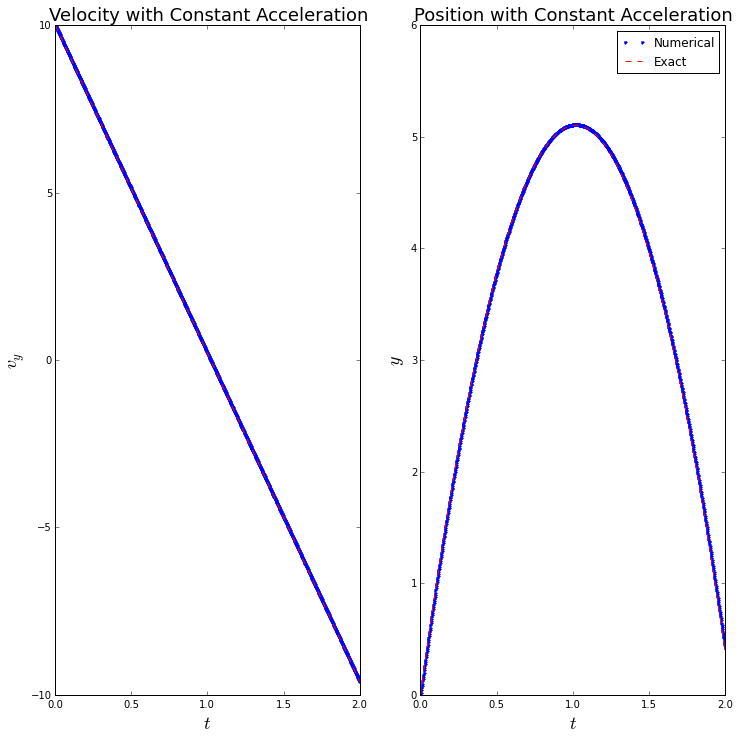

In [9]:
#Define our formula for the exact position in time
yexact = y0 + v0*texact + g/2*texact**2
fig, axes = plt.subplots(1,2,figsize=(12,12))
axes[0].plot(t,vy,'.')
axes[0].plot(texact,vexact,'r--')
axes[0].set_xlabel(r'$t$',fontsize=fs)
axes[0].set_ylabel(r'$v_y$',fontsize=fs)
axes[0].set_title('Velocity with Constant Acceleration',fontsize = fs)
axes[1].plot(t,y,'.',label='Numerical')
axes[1].plot(texact,yexact,'r--',label='Exact')
axes[1].set_xlabel(r'$t$',fontsize=fs)
axes[1].set_ylabel(r'$y$',fontsize=fs)
axes[1].set_title(r'Position with Constant Acceleration',fontsize=fs)
axes[1].legend(loc=1)

<p>Notice that we have only calculated the motion in the $y$-direction. Since our motion is 2D (in $x$ and $y$, see the first figure), we can also compute the motion in the x-direction. Now since gravity acts only in the $y$-direction, we say that 
$$
a_y = -g \\
a_x = 0
$$
which means consequentally that, while the $y$-velocity changes at a rate $-g$, the velocity in the $x$-direction isn't changing at all. Thus, in terms of our discretized quantities,
$$
v_{y,n+1}=v_{y,n}-g\Delta t, \\
v_{x,n+1}=v_{x,n}.
$$
Applying the same treatment as before then, we can compute (numerically) the motion in the $x$-direction.</p>

In [13]:
def euler_projectile_x(tsteps,ta,tb,x0,v0,theta):
    #Define delta t as just the distance between two adjacent points in our discretization
    #We may choose any two points because the spacing is uniform
    t = np.linspace(ta,tb,tsteps)
    deltat = t[1]-t[0]   #Make sure this is positive!

    #Let's make a vector (it can be full of zeros to start with) that will hold our position
    x = np.zeros([tsteps,1])
    #Now make a vector that will hold the velocities
    vx = np.zeros([tsteps,1])

    #Make the first entry of our position vector the initial position
    x[0] = x0
    #Make the first entry of the velocity vector the initial velocity
    vx[0] = np.cos(theta)*v0

    #Iterate over the time vector and find the position
    for i in range(tsteps-1):
        vx[i+1] = vx[i] 
        x[i+1] = x[i] + deltat*vx[i]
    
    return [t,x,vx]

<p>Now consider the case where the baseball isn't thrown just straight up, but at an angle so that there is velocity in both the $x$- and $y$-directions (i.e. horizontally and vertically). For example, let's say the baseball was thrown with speed $v_0=30$ m/s at an angle of $\theta=35^{\circ}$ from a height of $y_0=6$ m with an initial displacement in $x$ of $x_0=0$ m.</p>

In [14]:
#Define new initial velocities and positions
v0 = 30
theta = 35*np.pi/180
x0 = 0.0
y0 = 2.0
ta = 0
tb = 3.6
tsteps = 200
results = euler_projectile_x(tsteps,ta,tb,x0,v0,theta)
vx = results[2]
x = results[1]
results = euler_projectile_y(tsteps,ta,tb,y0,v0,theta)
y = results[1]
t = results[0]

(0, 88.468420783211116)

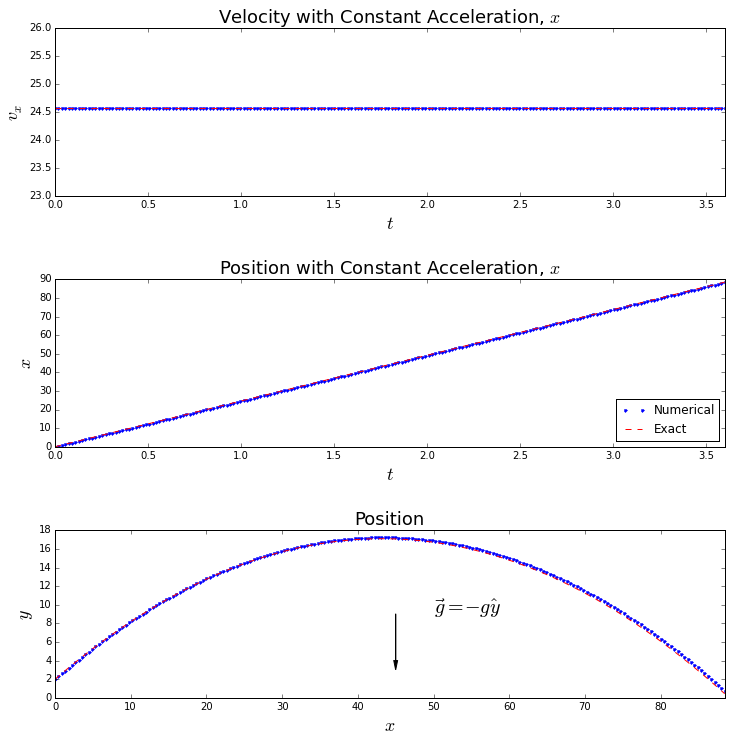

In [20]:
#Now plot the results
#Define our formula for the exact position in time
texact = np.linspace(ta,tb,1000)
yexact = y0 + v0*np.sin(theta)*texact + g/2*texact**2
xexact = v0*np.cos(theta)*texact
vxexact = v0*np.cos(theta)*np.ones([len(texact),1])
fig, axes = plt.subplots(3,1,figsize=(12,12))
plt.subplots_adjust(hspace=0.5)
axes[0].plot(t,vx,'.')
axes[0].plot(texact,vxexact,'r--')
axes[0].set_xlabel(r'$t$',fontsize=fs)
axes[0].set_ylabel(r'$v_x$',fontsize=fs)
axes[0].set_title(r'Velocity with Constant Acceleration, $x$',fontsize = fs)
axes[0].set_xlim([0,texact[-1]])
axes[1].plot(t,x,'.',label='Numerical')
axes[1].plot(texact,xexact,'r--',label='Exact')
axes[1].set_xlabel(r'$t$',fontsize=fs)
axes[1].set_ylabel(r'$x$',fontsize=fs)
axes[1].set_title(r'Position with Constant Acceleration, $x$',fontsize=fs)
axes[1].set_xlim([0,texact[-1]])
axes[1].legend(loc=4)
axes[2].plot(x,y,'.')
axes[2].plot(30*np.cos(35*np.pi/180)*texact,yexact,'--r')
axes[2].plot(xexact,np.zeros([len(xexact),1]),'k--')
axes[2].arrow(45,9,0,-5,head_width=0.5, head_length=1, fc='k', ec='k')
axes[2].text(50,9,r'$\vec{g}=-g\hat{y}$',fontsize=fs+2)
axes[2].set_xlabel(r'$x$',fontsize=fs)
axes[2].set_ylabel(r'$y$',fontsize=fs)
axes[2].set_title('Position',fontsize = fs)
axes[2].set_xlim([0,xexact[-1]])

<p>
Seeing as we could have just plotted our original motion using our analytic expression, all the extra work we did seems a little pointless. However, the only reason we could write down our analytic expression to begin with is because our motion in this case was <em>integrable</em>. That is, starting from the forces (or accelerations) acting on the object (a baseball in this case), we can successively integrate in time to find our position. However, this is not always possible as we will see in the following example.
</p>
<h2>Projectile Motion with Air Resistance</h2>
<p>
As you may (or may not) know, integration of a constant (e.g. $-9.8$ or $0$) is quite trivial. This means that in our last example, deriving an expression for position $x,y$ at any time $t$ was easy. But if our accelerations or forces involve terms that depend on the position or velocity, we have what is called a <em>differential equation</em>. Differential equations occur in essentially every problem in physics in one form or another. Unfortunately, there is hardly ever a way to write down a simple solution to said equations and we are often forced to rely on numerical techniques to solve these complicated expressions.
</p>
<p>
Air resistance (also called drag, air friction) acts in direct opposition to the motion of the object. Including effects due to air resistance (which are often important), the forces acting on the baseball can be written
$$
\vec{F}=\vec{g}+\vec{f}
$$
where
$$
\vec{f} = -b\vec{v}-cv\vec{v}
$$
and $\vec{v}=v_x\hat{x}+v_y\hat{y}$ with $v=\sqrt{v_x^2+v_y^2}$ being the speed or magnitude of the velocity.</p>
<p>
As you can see, all we've done is add an extra term (with both $x$- and $y$-components) to account for this new force. However, unlike before, we now have acceleration in both directions and to complicate things even further, the two directions are <em>coupled</em>. This is just a fancy way of saying that the $x$-component relies on the $y$-component and vice-versa. Fortunately, we can still handle this case with relative ease. Writing down the separate $x$- and $y$-components of the force,
$$
F_x=-bv_x-c\sqrt{v_x^2+v_y^2}~v_x \rightarrow a_x=-\frac{b}{m}v_x-\frac{c}{m}\sqrt{v_x^2+v_y^2}~v_x,\\
F_y=-mg-bv_y-c\sqrt{v_x^2+v_y^2}~v_y \rightarrow a_y=-g-\frac{b}{m}v_y-\frac{c}{m}\sqrt{v_x^2+v_y^2}~v_y. 
$$
This is exactly analogous to our first case without air resistance,
$$
F_x = 0\rightarrow a_x=0, \\
F_y = -mg\rightarrow a_y=-g.
$$
Note also that we did not define the cofficients $b$ and $c$ which describe the strength of each of the two of our air resistance terms. For a spherical projectile (recall we are working with a baseball), they are defined as
$$
b = \beta D = (1.6\times10^{-4}~\text{N s / m}^2)~D, \\
c = \gamma D^2 = (0.25~\text{N s / m}^4)~D^2,
$$
where $D$ is the diameter of the baseball. With these definitions, we are now able to write a function that numerically solves the $x$- and $y$-equations to find the position of the baseball at any time $t$ for motion that includes effects due to air resistance.
</p>

In [21]:
def euler_projectile_air(tsteps,ta,tb,x0,y0,v0,theta,m,D):
    #First define our discretized time using our input beginning and end times with the desired number of steps.
    t = np.linspace(ta,tb,tsteps)
    #Define the timestep
    deltat = t[1]-t[0]
    
    #Next make vectors to store all of the velocities and positions for both x and y
    vx = np.zeros([tsteps,1])
    vy = np.zeros([tsteps,1])
    x = np.zeros([tsteps,1])
    y = np.zeros([tsteps,1])
    
    #Input all the initial conditions for velocity and position for x and y
    vx[0] = np.cos(theta)*v0
    vy[0] = np.sin(theta)*v0
    x[0] = x0
    y[0] = y0
    
    #Define g,b and C coefficients
    b = 1.6e-4*D
    c = 0.2*D**2
    g = 9.8
    
    #Update all of the positions and velocities in time
    for i in range(tsteps-1):
        #Update acceleration
        ax = -b/m*vx[i] - c/m*vx[i]*np.sqrt(vx[i]**2+vy[i]**2)
        ay = -g - b/m*vy[i] - c/m*vy[i]*np.sqrt(vx[i]**2+vy[i]**2)
        #Update velocity
        vx[i+1] = vx[i] + ax*deltat
        vy[i+1] = vy[i] + ay*deltat
        #Update position
        x[i+1] = x[i] + vx[i]*deltat
        y[i+1] = y[i] + vy[i]*deltat
        
    #Return all of the necessary vectors
    return [t,x,y,vx,vy]

<p>Now, let's simulate the motion including air resistance of a baseball with mass $0.5$ kg, diameter of $15$ cm, lauched from $2$ m above the ground, at an angle of $20^{\circ}$ at $10$ m/s. We will simulate 3 s of flight time.</p>

In [23]:
#Run the simulation
results = euler_projectile_air(1000,0,3,0.0,2.0,20,55*np.pi/180,0.5,0.20)
t = results[0]
x = results[1]
y = results[2]
vx = results[3]
vy = results[4]

(array([ 0.]), array([ 25.84444951]))

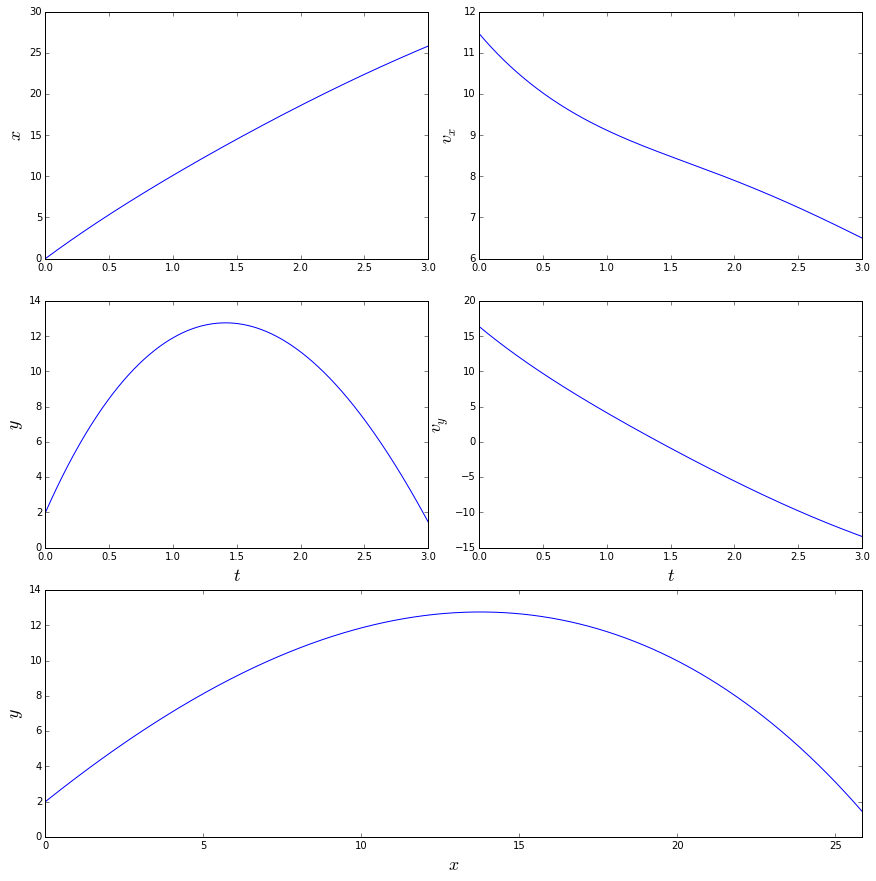

In [24]:
#Plot the results
#Do the formatting first
fig = plt.figure(figsize=(12,12))
ax1 = plt.subplot2grid((3,2),(0,0))
ax2 = plt.subplot2grid((3,2),(0,1))
ax3 = plt.subplot2grid((3,2),(1,0))
ax4 = plt.subplot2grid((3,2),(1,1))
ax5 = plt.subplot2grid((3,2),(2,0),colspan=2)
fig.tight_layout(h_pad=2.5,w_pad=2.5)
#Plot x,y,vx,vy
ax1.plot(t,x)
ax1.set_ylabel(r'$x$',fontsize=fs)
ax2.plot(t,vx)
ax2.set_ylabel(r'$v_x$',fontsize=fs)
ax3.plot(t,y)
ax3.set_xlabel(r'$t$',fontsize=fs)
ax3.set_ylabel(r'$y$',fontsize=fs)
ax4.plot(t,vy)
ax4.set_xlabel(r'$t$',fontsize=fs)
ax4.set_ylabel(r'$v_y$',fontsize=fs)
ax5.plot(x,y)
ax5.set_xlabel(r'$x$',fontsize=fs)
ax5.set_ylabel(r'$y$',fontsize=fs)
ax5.set_xlim([x[0],x[-1]])